# Apprendimento non supervisionato

## In questa sezione viene applicato l'apprendimento non supervisionato

### Import delle librerie e moduli necessari
 

In [2]:
# librerie generali
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#librerie per l'hard clustering
from sklearn.cluster import KMeans

# libreria per suddividere il dataset in train e test set
from sklearn.model_selection import train_test_split

# librerie per la rappresentazione del dataset
from sklearn.feature_extraction.text import TfidfVectorizer

# librerie utilizzate per la classificazione con l'output dek k-means
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# librerie utilizzate per le misure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# libreria utilizzata per la cross validation
from sklearn.model_selection import cross_val_score

random_seed = 3

In [3]:
featureSelectionReview_df = pd.read_csv("../datasets/featureSelectionReview_df.csv", index_col=0)

In [4]:
featureSelectionReview_df.drop(['numberPositiveReview', 'numberNegativeReview'], axis=1, inplace = True)
featureSelectionReview_df.head()

,00,099,10,100,11,12,13,14,15,16,...,york,yorker,young,yummy,zadist,zane,zero,zombie,zone,zsadist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.128192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Elbow method per il K-Means

In [5]:
#clean_df_cluster = clean_dataset
#clean_df_cluster['cluster'] = model.labels_
#algorithm{“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”

distortions = []
max_clusters = 15
clustersRange = range(2,max_clusters+1)
for k in clustersRange:
    print("Calculation with "+str(k)+" clusters...")
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter = 5000, random_state = random_seed, algorithm = "elkan")
    kmeanModel.fit(featureSelectionReview_df)
    distortions.append(kmeanModel.inertia_)
    

Calculation with 2 clusters...
Calculation with 3 clusters...
Calculation with 4 clusters...
Calculation with 5 clusters...
Calculation with 6 clusters...
Calculation with 7 clusters...
Calculation with 8 clusters...
Calculation with 9 clusters...
Calculation with 10 clusters...
Calculation with 11 clusters...
Calculation with 12 clusters...
Calculation with 13 clusters...
Calculation with 14 clusters...
Calculation with 15 clusters...


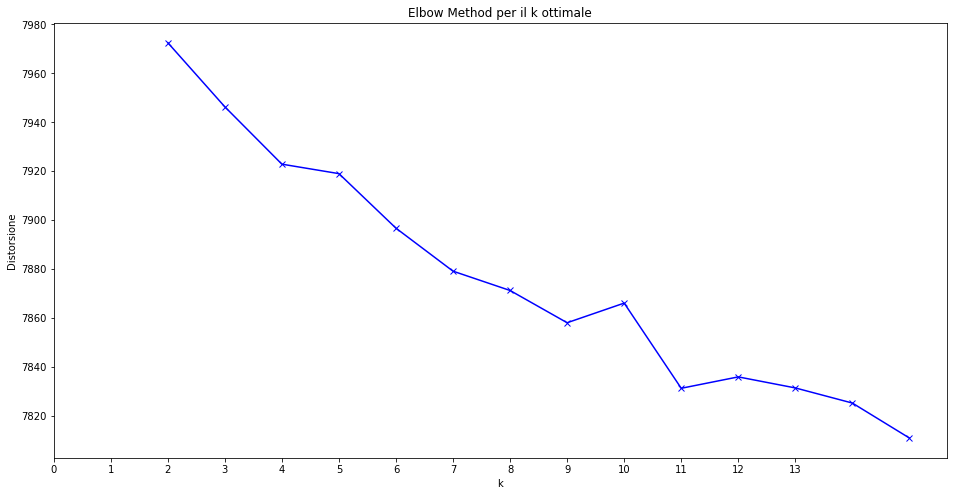

In [6]:
plt.figure(figsize=(16,8))
plt.plot(clustersRange, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsione')
plt.xticks(np.arange(len(distortions)), np.arange(len(distortions)))
plt.title('Elbow Method per il k ottimale')
plt.show()

## K-Means

In [7]:
n_cluster = 4

model = KMeans(n_clusters=n_cluster, init='k-means++', max_iter = 10000, random_state = random_seed, algorithm = "elkan")
model.fit(featureSelectionReview_df)

KMeans(algorithm='elkan', max_iter=10000, n_clusters=4, random_state=3)

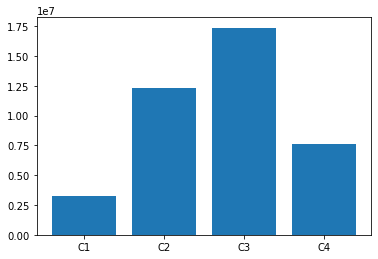

In [8]:
clean_df_cluster = featureSelectionReview_df
clean_df_cluster['cluster'] = model.labels_

clusters_name = ('C1', 'C2', 'C3', 'C4')
clusters_cardinality = np.zeros(n_cluster)
for c in range(0,n_cluster):
    clusters_cardinality[c] = clean_df_cluster[clean_df_cluster['cluster'] == c].size

y_pos = np.arange(len(clusters_cardinality))
plt.bar(y_pos, clusters_cardinality)
plt.xticks(y_pos, clusters_name)
plt.show()

In [9]:
words = featureSelectionReview_df.columns
centroid = model.cluster_centers_

words_to_print = 20
for num, centroid in enumerate(centroid):
    most_important_words_index = np.argpartition(-centroid, words_to_print)[:words_to_print]  
    most_important_words = list()
    for index, word_index in enumerate(most_important_words_index):
        most_important_words.append(words[word_index])
        
    print("Most important words for centroid "+str(num)+":"+str(most_important_words)+"\n")


Most important words for centroid 0:['love', 'end', 'get', 'really', 'like', 'good', 'great', 'character', 'little', 'read', 'story', 'write', 'well', 'much', 'would', 'one', 'author', 'book', 'short', 'enjoy']

Most important words for centroid 1:['like', 'story', 'read', 'book', 'really', 'would', 'character', 'one', 'get', 'go', 'end', 'time', 'want', 'sex', 'much', 'know', 'think', 'love', 'good', 'make']

Most important words for centroid 2:['time', 'kindle', 'story', 'find', 'love', 'read', 'book', 'get', 'well', 'author', 'character', 'like', 'good', 'write', 'one', 'would', 'great', 'much', 'make', 'enjoy']

Most important words for centroid 3:['read', 'great', 'book', 'love', 'good', 'series', 'character', 'enjoy', 'story', 'like', 'really', 'would', 'author', 'one', 'recommend', 'write', 'well', 'get', 'look', 'keep']



## Definizione funzione per K-Fold Cross Validation

In [10]:
def kCrossValidation(model, dataset, labels):
    k = []
    acc = []
    dev = []

    folds = [5, 10]
    #nota, non viene effettuato lo shuffle dei fold, quindi sono sempre gli stessi, sono già istanziati
    for i in folds:
        print("Calculating with " + str(i) + " folds...")
        scores = cross_val_score(model, dataset, labels, cv=i)
        print("K cross validation, k= ", i)
        k.append(i)
        print("Average scores: ", scores.mean())
        acc.append(scores.mean())
        print("Standard Deviation of scores: ", scores.std())
        dev.append(scores.std())
        print("\n\n")

# SVM classificazione con classi derivanti dall'output del K-means

In [11]:
labels = clean_df_cluster["cluster"]
df_no_lable = clean_df_cluster.drop(["cluster"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(df_no_lable, labels, test_size=0.2, random_state=random_seed)

In [12]:
kernel_found = 'linear'
C_found = 0.5
gamma_found = 0.0001

In [13]:
svm = SVC(random_state=random_seed, kernel = kernel_found, C = C_found, gamma = gamma_found)
svm.fit(X_train, Y_train)

train_prediction = svm.predict(X_train)
test_prediction = svm.predict(X_test)

In [14]:
accuracy_train_svm = accuracy_score(Y_train, train_prediction)
accuracy_test_svm = accuracy_score(Y_test, test_prediction)

print("Accuracy train score: ", accuracy_train_svm)
print("Accuracy test score: ", accuracy_test_svm)

Accuracy train score:  0.9841253153910849
Accuracy test score:  0.9478772593526692


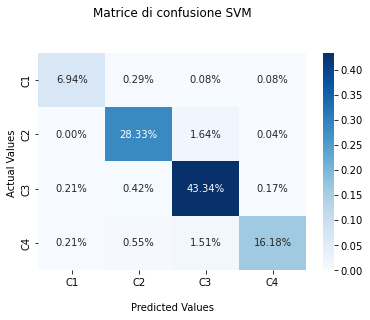

In [15]:
cf_matrix = confusion_matrix(Y_test, test_prediction)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Matrice di confusione SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(clusters_name)
ax.yaxis.set_ticklabels(clusters_name)

plt.show()

## K-fold Cross Validation

In [16]:
kCrossValidation(svm, df_no_lable, labels)

Calculating with 5 folds...
K cross validation, k=  5
Average scores:  0.9405433936063063
Standard Deviation of scores:  0.002730244241311725



Calculating with 10 folds...
K cross validation, k=  10
Average scores:  0.9414689273522697
Standard Deviation of scores:  0.0067141497172855755





# NN classificazione con classi derivanti dall'output del K-means

In [17]:
with open('../resources/best_nn_params.pkl', 'rb') as f:
    best_params = pickle.load(f)
    
hidden_layer_sizes_found = best_params.get('hidden_layer_sizes')
activation_found = best_params.get('activation')
solver_found = best_params.get('solver')
alpha_found = best_params.get('alpha')
learning_rate_found = best_params.get('learning_rate')

In [18]:
mlp = MLPClassifier(max_iter=500, 
                    random_state = random_seed,
                    hidden_layer_sizes = hidden_layer_sizes_found,
                    activation = activation_found,
                    solver = solver_found,
                    alpha = alpha_found,
                    learning_rate = learning_rate_found
                   )

mlp.fit(X_train, Y_train)

train_prediction = mlp.predict(X_train)
test_prediction = mlp.predict(X_test)

In [19]:
accuracy_train_nn = accuracy_score(Y_train, train_prediction)
accuracy_test_nn = accuracy_score(Y_test, test_prediction)

print("Accuracy train score: ", accuracy_train_nn)
print("Accuracy test score: ", accuracy_test_nn)

Accuracy train score:  1.0
Accuracy test score:  0.8907103825136612


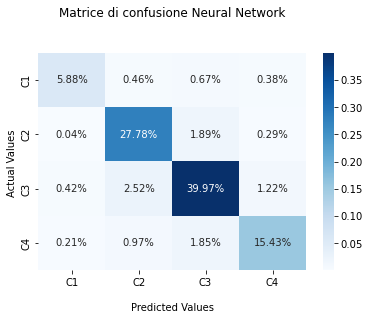

In [20]:
cf_matrix = confusion_matrix(Y_test, test_prediction)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Matrice di confusione Neural Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(clusters_name)
ax.yaxis.set_ticklabels(clusters_name)

plt.show()

## K-fold Cross Validation

In [21]:
kCrossValidation(mlp, df_no_lable, labels)

Calculating with 5 folds...
K cross validation, k=  5
Average scores:  0.879489406713
Standard Deviation of scores:  0.010403038089812395



Calculating with 10 folds...
K cross validation, k=  10
Average scores:  0.8856277784452722
Standard Deviation of scores:  0.012810416147764384



